In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('../creditcard.csv')

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
#lets create independent and dependent feature.

columns = [column for column in dataset.columns if column != 'Class'] # not in ['Class'] 

In [16]:
dependent_feature = 'Class'
independent_features = columns

In [20]:
state = np.random.RandomState(45)
X = dataset[independent_features]
y = dataset[dependent_feature]

In [21]:
X.shape, y.shape

((284807, 30), (284807,))

# Exploratory Data Analysis

Text(0.5, 1.0, 'Transaction Analysis (Normal and Fraud)')

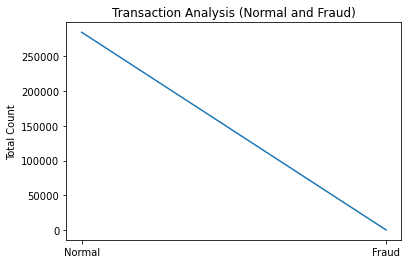

In [33]:
# we will check for how may values are there with respective to "0"  and "1"
classes = pd.value_counts(dataset['Class'], sort=True)
classes.plot(kind="line", rot=0)
plt.xticks(ticks=range(2), labels = ['Normal','Fraud'])
plt.ylabel("Total Count")
plt.title("Transaction Analysis (Normal and Fraud)")


In [35]:
# Count of normal and fraud dataset

normal = dataset[dataset['Class'] == 0]
fraud  =dataset[dataset['Class'] == 1]

In [36]:
normal.shape, fraud.shape

((284315, 31), (492, 31))

In [39]:
#Under sampling of Imbalanced dataset
#!pip install imblearn

In [45]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
X_res, y_res = nm.fit_resample(X,y)

In [46]:
X_res.shape, y_res.shape

((984, 30), (984,))

In [48]:
#Without under sampling(Y )vs under sampling (Y)

from collections import Counter

print("{} from original dataset".format(Counter(y)))
print("{} after undersampling dataset".format(Counter(y_res)))

Counter({0: 284315, 1: 492}) from original dataset
Counter({0: 492, 1: 492}) after undersampling dataset
